In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif as MIC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('Bondora_preprocessed2.csv')
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.0,12,130.393314,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,10500.0,0,0.0,0,0.0,0.0,25,F,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.0,1,130.393314,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,10800.0,0,0.0,0,0.0,0.0,15,F,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.0,20,130.393314,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,7000.0,0,0.0,0,0.0,0.0,25,F,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.0,15,130.393314,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,11600.0,0,0.0,0,0.0,0.0,15,F,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.0,12,130.393314,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,6800.0,0,0.0,0,0.0,0.0,25,F,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1


In [3]:
df.shape

(77394, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  fl

In [5]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [6]:
num_data = df[num_col]

In [7]:
X = df.copy()
y = X.pop('Status_new')

In [8]:
def score_dataset(X, y, model=XGBClassifier()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    
    # Metric for classification is accuracy
    scoring = 'accuracy'
    
    # Perform cross-validation and calculate mean accuracy score
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    mean_score = scores.mean()
    
    return mean_score

In [9]:
score_dataset(X,y)

0.9139720729720631

In [10]:
def miscore(X, y):
    mi_scores = MIC(X,y)
    mi_score = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [11]:
mi_score = miscore(X,y)
mi_score

InterestAndPenaltyBalance                 0.345862
PrincipalPaymentsMade                     0.281447
PrincipalBalance                          0.252006
InterestAndPenaltyPaymentsMade            0.069932
Interest                                  0.060018
MonthlyPayment                            0.058849
City                                      0.053254
AppliedAmount                             0.043474
Amount                                    0.041820
Rating                                    0.027087
LanguageCode                              0.023628
Country                                   0.023612
IncomeTotal                               0.021218
BidsPortfolioManager                      0.021186
LoanDuration                              0.018178
Restructured                              0.015989
MonthlyPaymentDay                         0.011208
AmountOfPreviousLoansBeforeLoan           0.010976
MaritalStatus                             0.010456
UseOfLoan                      

In [12]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

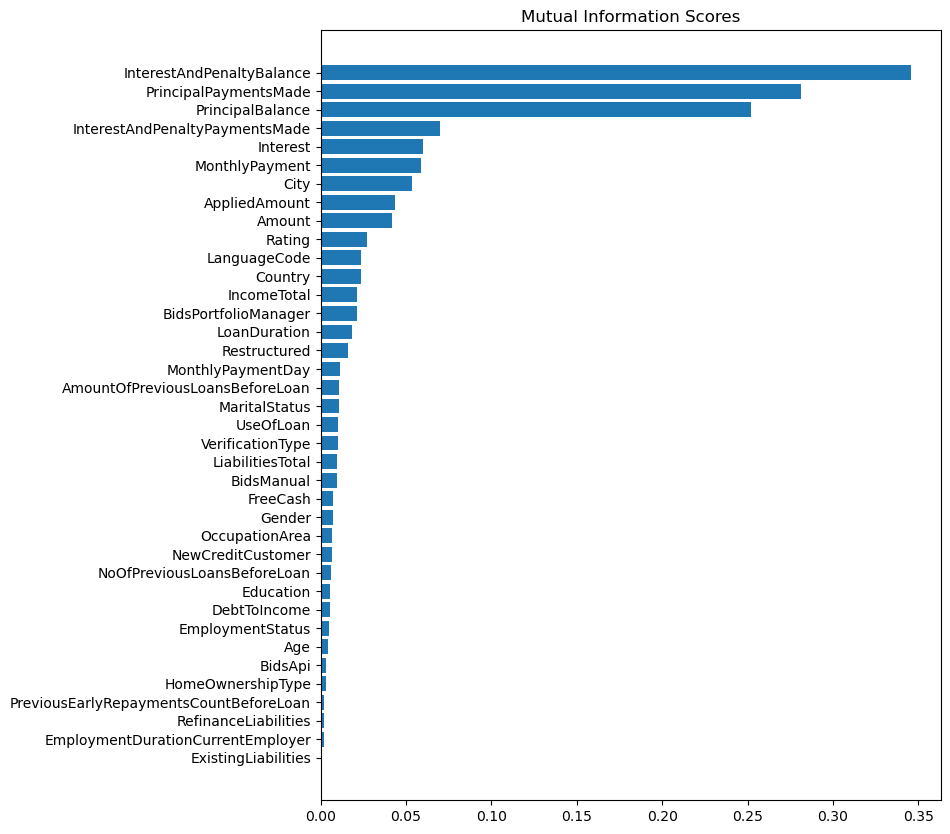

In [13]:
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_score)

In [14]:
mi_score.head(10)

InterestAndPenaltyBalance         0.345862
PrincipalPaymentsMade             0.281447
PrincipalBalance                  0.252006
InterestAndPenaltyPaymentsMade    0.069932
Interest                          0.060018
MonthlyPayment                    0.058849
City                              0.053254
AppliedAmount                     0.043474
Amount                            0.041820
Rating                            0.027087
Name: MI Scores, dtype: float64

## Handling Outliers

In [15]:
X = df.copy()
for i in num_data.columns:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    median = X[i].median()
    out1 = X[(X[i]<lower_extreme)].values
    out2 = X[X[i]>upper_extreme].values
    X[i].replace(out1, median, inplace=True)
    X[i].replace(out2,median,inplace=True)

In [16]:
y = X.pop('Status_new')

In [17]:
score_dataset(X,y)

0.9139720729720631

In [18]:
mi_score = miscore(X, y)
mi_score

InterestAndPenaltyBalance                 0.344196
PrincipalPaymentsMade                     0.282551
PrincipalBalance                          0.251064
InterestAndPenaltyPaymentsMade            0.068759
MonthlyPayment                            0.060766
Interest                                  0.060401
City                                      0.053769
Amount                                    0.044529
AppliedAmount                             0.042333
Rating                                    0.025916
Country                                   0.023721
BidsPortfolioManager                      0.023176
IncomeTotal                               0.022821
LanguageCode                              0.020173
LoanDuration                              0.018363
Restructured                              0.013469
MonthlyPaymentDay                         0.011727
LiabilitiesTotal                          0.011630
BidsManual                                0.010604
MaritalStatus                  

In [19]:
# plt.figure(dpi=100, figsize=(8, 10))
# plot_mi_scores(mi_score)

## Feature Creation

Create the following features:
- PrincipalPaymentDifference: The difference of PrincipalPaymentsMade and PrincipalBalance
- AvgMonthlyPayment: This is the average monthly payment for each Rating category

In [20]:
X1 = pd.DataFrame()
X1['PrincipalPaymentDifference'] = X['PrincipalPaymentsMade']-X['PrincipalBalance']

In [21]:
# rating_avg_payment = X.groupby('Rating')['MonthlyPayment'].mean().reset_index()
# rating_avg_payment.columns = ['Rating', 'AvgMonthlyPayment']

In [22]:
X_new = X.join([X1])

In [23]:
# X_new = pd.merge(X_new, rating_avg_payment, on='Rating', how='left')

In [24]:
score_dataset(X_new, y)

0.9158327375853315

In [25]:
mi_score=miscore(X_new,y)

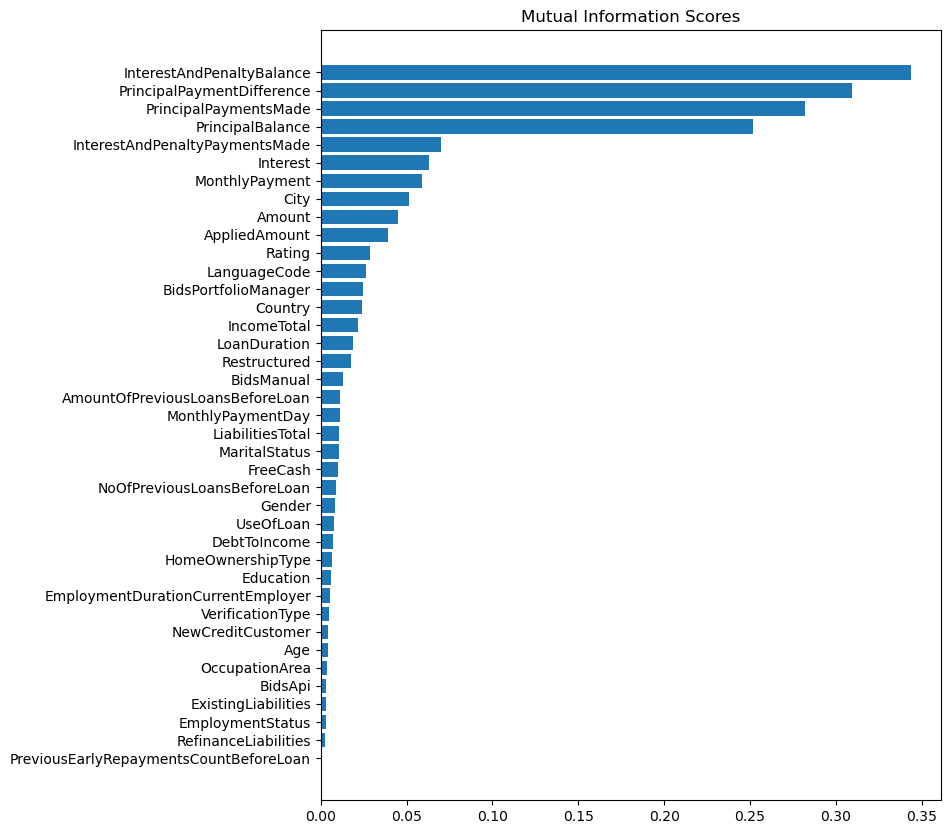

In [26]:
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_score)

In [27]:
mi_score

InterestAndPenaltyBalance                 0.343836
PrincipalPaymentDifference                0.309603
PrincipalPaymentsMade                     0.281785
PrincipalBalance                          0.251741
InterestAndPenaltyPaymentsMade            0.070035
Interest                                  0.063140
MonthlyPayment                            0.059046
City                                      0.051429
Amount                                    0.044805
AppliedAmount                             0.039149
Rating                                    0.028420
LanguageCode                              0.026203
BidsPortfolioManager                      0.024341
Country                                   0.024228
IncomeTotal                               0.021633
LoanDuration                              0.019007
Restructured                              0.017811
BidsManual                                0.013104
AmountOfPreviousLoansBeforeLoan           0.011175
MonthlyPaymentDay              

We've got some important columns after knowing MI Score and performing Feature Creation

## Standardization

In [30]:
scaler = preprocessing.StandardScaler()
X_new1 = scaler.fit_transform(X_new)

In [31]:
X_new1
X_scaled1 = pd.DataFrame(X_new1, columns=X_new.columns)
X_scaled1

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalPaymentDifference
0,-0.797744,-0.200338,-0.545166,0.764047,-2.125478,-1.029636,1.754759,-1.453178,-0.870185,-0.985367,-1.089632,-0.336460,-1.975685,2.260636e-16,-0.834083,-1.427100,-1.336016,-1.921731,-0.867972,-1.349599,-2.168156,-1.108743,1.393574,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,-0.500610,-0.583783,-0.581728,-0.705794,-0.377336,-0.069426,-0.537235,-0.201408,0.141593
1,-0.797744,-0.200338,-0.514056,-1.308820,-2.125478,-1.029636,0.688205,-1.453178,-0.870185,-1.037254,-1.077817,-0.499764,-2.645915,2.260636e-16,-0.833479,-1.427100,-0.438598,-1.380397,-0.867972,-0.882531,-1.966978,-1.108743,1.442012,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,0.496648,-1.219449,-0.500610,-0.568278,-0.603919,-0.705794,-0.377336,0.423663,-0.492869,-0.201408,0.150428
2,-0.797744,-0.200338,-0.296287,0.764047,-2.125478,-1.029636,1.508631,-1.453178,-0.870185,-0.985367,-0.995118,-0.499764,-1.488245,2.260636e-16,-0.832876,-1.284852,0.458820,-1.921731,-0.867972,-0.415463,-1.765799,-1.108743,0.828460,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,1.997564,-0.530321,-0.534282,-0.645952,-0.248742,-0.562515,-0.558596,-0.201408,0.131846
3,-0.797744,-0.200338,-0.615163,0.764047,-2.125478,-1.029636,-1.362860,-1.453178,-0.870185,-1.063198,-1.116217,0.153452,-1.792895,2.260636e-16,-0.832272,-1.142604,1.356239,-0.839063,0.159904,0.051605,-1.564621,-1.108743,1.571181,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,0.496648,-1.219449,-0.500610,-0.618668,-0.583766,-0.705794,-0.377336,-0.069426,-0.524089,-0.201408,0.121713
4,-0.797744,-0.200338,-0.296286,0.764047,-2.125478,-1.029636,-1.198775,-1.453178,-0.870185,-0.985367,-0.995117,-0.336460,-1.975685,2.260636e-16,-0.831668,-1.000356,0.458820,-0.297729,-0.867972,0.051605,-2.168156,-1.108743,0.796168,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,-0.500610,-0.459756,-0.340524,-0.705794,-0.377336,-0.069426,-0.520803,-0.201408,0.212271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.844760,-0.200338,-0.094958,0.764047,2.051856,0.726604,-0.214263,0.355210,0.362985,0.102708,0.243715,-0.303473,0.948954,-1.806595e-01,-0.712735,-1.142604,-1.336016,-0.839063,-0.867972,-0.882531,-1.564621,0.697891,-0.075721,-0.672756,-0.004820,-0.267193,-0.229597,0.703743,-1.411722,0.288541,-0.500610,0.746322,-0.606358,-0.705794,-0.377336,-0.562515,-0.558596,-0.201408,0.899565
77390,0.430052,-0.200338,0.677781,-1.308820,2.051856,0.726604,-0.378349,0.355210,0.362985,0.102708,0.243715,-0.720224,0.948954,-3.584293e-01,-0.737488,-1.284852,-1.336016,-0.839063,-0.867972,-0.882531,-0.961086,-1.108743,0.063943,0.471963,0.023828,-0.267193,1.039533,0.383565,-0.593849,1.796530,-0.500610,1.165891,1.793688,-0.705794,-0.377336,-0.069426,0.212705,-0.201408,1.138661
77391,0.492095,-0.200338,-0.046282,0.764047,0.659411,0.726604,0.031864,0.355210,0.362985,-0.100257,0.012629,-0.505316,0.948954,-3.974830e-01,-0.352918,-1.142604,-1.336016,-1.921731,3.243535,-0.882531,-0.759908,-1.108743,0.101886,-0.386576,0.014242,-0.267193,-0.467061,1.030534,-1.411722,0.791204,-0.500610,0.480422,-0.365959,-0.381644,0.004026,-0.562515,-0.558596,-0.201408,0.530223
77392,0.403929,-0.200338,0.726458,-1.308820,-0.733033,-1.029636,0.606163,-1.453178,-0.870185,0.102708,0.2

## Normalization

In [32]:
scale = MinMaxScaler()
X_new2 = scale.fit_transform(X_new)

In [33]:
X_new2

array([[0.        , 0.        , 0.0108223 , ..., 0.00162581, 0.        ,
        0.50541012],
       [0.        , 0.        , 0.01322725, ..., 0.00500248, 0.        ,
        0.50661238],
       [0.        , 0.        , 0.0300619 , ..., 0.        , 0.        ,
        0.50408394],
       ...,
       [0.18588235, 0.        , 0.04938852, ..., 0.        , 0.        ,
        0.55829195],
       [0.17317647, 0.        , 0.10912512, ..., 0.00978397, 0.        ,
        0.60616723],
       [0.28141176, 0.        , 0.00094073, ..., 0.04891985, 0.        ,
        0.49754609]])

In [34]:
X_scaled = pd.DataFrame(X_new2, columns=X_new.columns)
X_scaled

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalPaymentDifference
0,0.000000,0.0,0.010822,1.0,0.00,0.000000,0.792208,0.0,0.000000,0.027132,0.010225,0.103326,0.186441,0.055052,0.000000,0.0000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.010375,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,0.0,0.010820,0.001408,0.003206,0.000041,0.041667,0.001626,0.0,0.505410
1,0.000000,0.0,0.013227,0.0,0.00,0.000000,0.623377,0.0,0.000000,0.015073,0.012631,0.084191,0.000000,0.055052,0.000151,0.0000,0.2,0.2,0.0,0.125,0.052632,0.000000,0.010672,0.000000,0.000000,0.000000,0.000000,0.014477,0.535714,0.000000,0.0,0.013225,0.000139,0.003206,0.000041,0.083333,0.005002,0.0,0.506612
2,0.000000,0.0,0.030062,1.0,0.00,0.000000,0.753247,0.0,0.000000,0.027132,0.029471,0.084191,0.322034,0.055052,0.000302,0.0625,0.4,0.0,0.0,0.250,0.105263,0.000000,0.006917,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,1.0,0.019111,0.004120,0.014115,0.006461,0.000000,0.000000,0.0,0.504084
3,0.000000,0.0,0.005411,1.0,0.00,0.000000,0.298701,0.0,0.000000,0.009044,0.004812,0.160729,0.237288,0.055052,0.000453,0.1250,0.6,0.4,0.2,0.375,0.157895,0.000000,0.011462,0.000000,0.000000,0.000000,0.000000,0.014477,0.535714,0.000000,0.0,0.005410,0.001291,0.003206,0.000041,0.041667,0.002626,0.0,0.502705
4,0.000000,0.0,0.030062,1.0,0.00,0.000000,0.324675,0.0,0.000000,0.027132,0.029472,0.103326,0.186441,0.055052,0.000604,0.1875,0.4,0.6,0.0,0.375,0.000000,0.000000,0.006719,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,0.0,0.030055,0.015194,0.003206,0.000041,0.041667,0.002876,0.0,0.515027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.236706,0.0,0.045626,1.0,0.75,0.428571,0.480519,0.5,0.333333,0.280003,0.281735,0.107191,1.000000,0.045463,0.030344,0.1250,0.0,0.4,0.0,0.125,0.157895,0.454545,0.001383,0.027778,0.000040,0.000000,0.038834,0.019396,0.035714,0.428571,0.0,0.217098,0.000000,0.003206,0.000041,0.000000,0.000000,0.0,0.608549
77390,0.176941,0.0,0.105362,0.0,0.75,0.428571,0.454545,0.5,0.333333,0.280003,0.281735,0.058360,1.000000,0.036026,0.024155,0.0625,0.0,0.4,0.0,0.125,0.315789,0.000000,0.002238,0.138889,0.000143,0.000000,0.159479,0.017710,0.250000,0.857143,0.0,0.282167,0.137175,0.003206,0.000041,0.041667,0.058704,0.0,0.641084
77391,0.185882,0.0,0.049389,1.0,0.50,0.428571,0.519481,0.5,0.333333,0.232833,0.234679,0.083541,1.000000,0.033953,0.120320,0.1250,0.0,0.0,0.8,0.125,0.368421,0.000000,0.002470,0.055556,0.000109,0.000000,0.016261,0.021117,0.035714,0.571429,0.0,0.175862,0.013740,0.062294,0.019080,0.000000,0.000000,0.0,0.558292
77392,0.173176,0.0,0.109125,0.0,0.25,0.000000,0.610390,0.0,0.000000,0.280003,0.281735,0.056408,1.000000,0.035680,0.010266,0.0000,0.2,0.0,0.0,0.125,0.473684,0.181818,0.000534,0.222222,0.000059,0.086957,0.223967,0.014791,0.035714,0.857143,1.0,0.212334,0.038707,0.003206,0.000041,0.041667,0.009784,0.0,0.606167


In [35]:
mi_score=miscore(X_scaled,y)

In [36]:
mi_score

InterestAndPenaltyBalance                 0.344390
PrincipalPaymentDifference                0.308868
PrincipalPaymentsMade                     0.282590
PrincipalBalance                          0.251464
InterestAndPenaltyPaymentsMade            0.069370
Interest                                  0.060423
MonthlyPayment                            0.058186
City                                      0.049902
Amount                                    0.043284
AppliedAmount                             0.037736
Rating                                    0.024470
LanguageCode                              0.023434
Country                                   0.021934
BidsPortfolioManager                      0.021100
IncomeTotal                               0.021001
LoanDuration                              0.018077
Restructured                              0.016694
BidsManual                                0.012847
LiabilitiesTotal                          0.011512
MonthlyPaymentDay              

In [38]:
mi_score[mi_score > 0.01].index

Index(['InterestAndPenaltyBalance', 'PrincipalPaymentDifference',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyPaymentsMade', 'Interest', 'MonthlyPayment', 'City',
       'Amount', 'AppliedAmount', 'Rating', 'LanguageCode', 'Country',
       'BidsPortfolioManager', 'IncomeTotal', 'LoanDuration', 'Restructured',
       'BidsManual', 'LiabilitiesTotal', 'MonthlyPaymentDay',
       'AmountOfPreviousLoansBeforeLoan', 'FreeCash'],
      dtype='object')

In [39]:
feature_cols = ['InterestAndPenaltyBalance', 'PrincipalPaymentDifference',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyPaymentsMade', 'Interest', 'MonthlyPayment',
       'Amount', 'AppliedAmount', 'LanguageCode', 'Rating', 'Country','Restructured','LoanDuration','MonthlyPaymentDay']

In [40]:
imp = X_new[feature_cols]
imp.shape

(77394, 15)

## PCA

In [41]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(imp)
threshold=0.95
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(num_components)

3


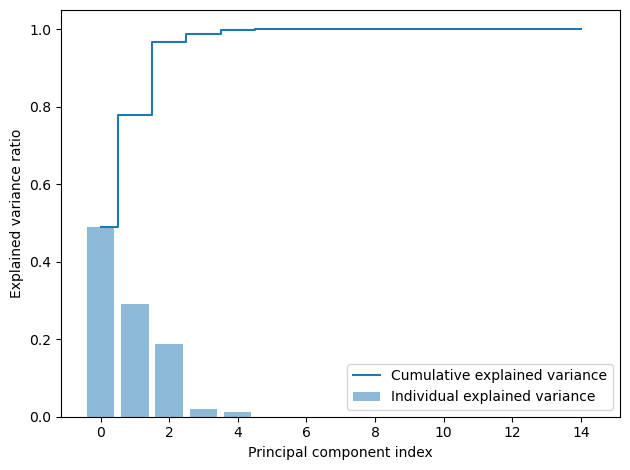

In [42]:
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

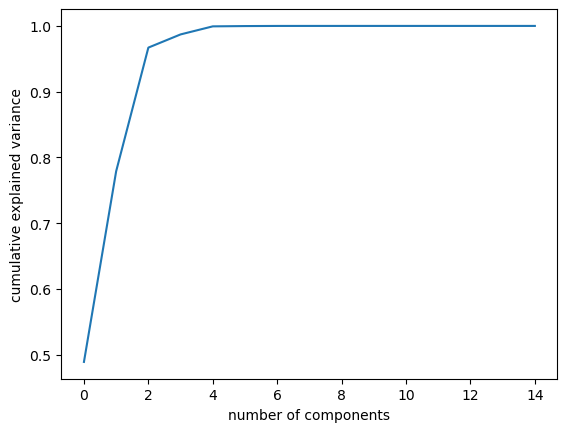

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
pca = PCA(n_components=3)
data_transformed = pca.fit_transform(imp)

In [45]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score
# X_train, X_test, y_train, y_test = train_test_split(imp, y, test_size=0.3, random_state=42)
# # Create a k-NN classifier with k=3
# knn = KNeighborsClassifier(n_neighbors=3)

# # Fit the classifier to the training data
# knn.fit(X_train, y_train)

# # Predict the classes of the test data
# y_pred = knn.predict(X_test)
# accuracy = accuracy_score(y_test,y_pred)
# precision = precision_score(y_test,y_pred)
# f1 = f1_score(y_test, y_pred)
# print(accuracy)
# print(classification_report(y_test, y_pred))

In [46]:
# from xgboost import XGBClassifier

In [47]:
# model = XGBClassifier()
# X_train, X_test, y_train, y_test = train_test_split(imp, y, test_size=0.3, random_state=42)

In [48]:
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test,y_pred)
# print(accuracy)

In [49]:
# print(classification_report(y_test, y_pred))

In [50]:
Final_data = pd.concat([imp,y],axis=1)

In [51]:
Final_data.to_csv('Important_features.csv',index=False)

In [52]:
data = pd.read_csv('Important_features.csv')

In [53]:
data.head()

,InterestAndPenaltyBalance,PrincipalPaymentDifference,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,Status_new
0,0.00,115.0408,115.0408,0.00,20.4222,30.0,130.393314,115.0408,319.5582,0,0,0,False,12,25,0
1,0.00,140.6057,140.6057,0.00,2.0227,25.0,130.393314,140.6057,191.7349,0,0,0,False,1,15,0
2,414.07,86.8409,203.1909,116.35,59.7626,25.0,130.393314,319.5409,319.5582,0,0,0,True,20,25,1
3,0.00,57.5205,57.5205,0.00,18.7323,45.0,130.393314,57.5205,127.8233,0,0,0,False,15,15,0
4,0.00,319.5436,319.5436,0.00,220.4200,30.0,130.393314,319.5436,319.5582,0,0,0,False,12,25,1


In [54]:
data.shape

(77394, 16)